In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import nltk
from nltk import word_tokenize
excel_file = r'C:\Users\colte\OneDrive\Documents\Research\AnalysisofSimpleNetwork.xlsx'
sheet_1 = 'Sheet1'
workbook = load_workbook(excel_file, read_only=False, data_only=False, keep_links=True)
sheet = workbook[sheet_1]
data=[]
for row in sheet.iter_rows(values_only=True): data.append(row)
workbook.close()
df = pd.read_excel(excel_file, header=0)

In [2]:
df_sorted = df.sort_values(by='Degree', ascending=False)

In [3]:
df.describe()

,Degree,Closeness,Eccentricity,Clustering Coefficient,Stress,Neighborhood Connectivity,Betweeness,Radiality,# Undirected edges,Topological Coefficeint,...,Kidney,Intestine,Liver,Muscle,Saliva,Nervous System,Pancreas,Intestine.1,VariantDisease Association Score,Association Z-Score
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,50.000000,52.000000,51.000000,52.000000,52.000000,52.000000
mean,5.538462,0.351987,3.596154,0.586504,217.269231,6.238321,0.035565,inf,5.538462,0.421734,...,2.397096,2.573436,3.055386,2.450137,1.357550,3.904727,1.864045,2.573436,0.606154,5.353077
std,3.522819,0.185210,1.549948,0.383966,346.039107,3.163657,0.064762,NaN,3.522819,0.243970,...,0.827674,0.864360,1.275257,0.824531,0.625310,1.090810,0.804667,0.864360,0.320117,1.488249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808587,0.000000,0.000000,...,0.545455,0.892095,0.951709,0.797783,0.380211,1.746586,0.329059,0.892095,0.000000,2.700000
25%,3.000000,0.297588,4.000000,0.330128,0.000000,4.125000,0.000000,0.844365,3.000000,0.263089,...,1.825873,1.991460,2.026099,1.967120,0.847619,2.997572,1.361913,1.991460,0.700000,4.000000
50%,5.000000,0.358333,4.000000,0.666667,0.000000,7.000000,0.000000,0.873882,5.000000,0.453070,...,2.418601,2.592849,2.647736,2.284186,1.325147,4.495675,1.801952,2.592849,0.700000,5.300000
75%,8.000000,0.414465,4.250000,1.000000,394.000000,8.875000,0.025763,0.901163,8.000000,0.666667,...,2.781350,3.029287,4.487209,2.889894,1.817062,4.808645,2.247295,3.029287,0.800000,6.525000
max,13.000000,1.000000,5.000000,1.000000,1624.000000,9.800000,0.262555,inf,13.000000,0.777778,...,4.566505,4.774058,4.980206,4.695187,2.830816,4.990222,4.481767,4.774058,0.900000,8.200000


In [4]:
numeric_columns = df.select_dtypes(include=['number'])

In [5]:
print(numeric_columns.median())

Degree                              5.000000
Closeness                           0.358333
Eccentricity                        4.000000
Clustering Coefficient              0.666667
Stress                              0.000000
Neighborhood Connectivity           7.000000
Betweeness                          0.000000
Radiality                           0.873882
# Undirected edges                  5.000000
Topological Coefficeint             0.453070
Nucleus                             5.000000
Plasma Membrane                     1.588265
Mitochondrion                       1.615661
Extracellular                       1.414986
Blood                               2.677575
Bone                                1.437480
Bone Marrow                         1.848872
Cytoskeleton                        1.608262
Cytosol                             2.607062
Heart                               2.168425
Kidney                              2.418601
Intestine                           2.592849
Liver     

In [6]:
import re
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

In [7]:
seq_records = []
for index, row in df.iterrows():
    protein_name = row['Protein Name']
    protein_sequence = row['Sequence'].replace('\n', '')
    seq = Seq(protein_sequence)
    record = SeqRecord(seq, id=protein_name, description='')
    seq_records.append(record)

In [8]:
fasta_file_path = 'protein_sequences.fasta'
with open(fasta_file_path, 'w') as output_file:
    SeqIO.write(seq_records, output_file, 'fasta')

In [9]:
sequences = []
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence_description = record.description
        sequence = str(record.seq) 
        sequences.append({'ID': sequence_id,'Description': sequence_description,'Sequence': sequence})

In [10]:
for seq_info in sequences:
    print(f"ID: {seq_info['ID']}")
    print(f"Description: {seq_info['Description']}")
    print(f"Sequence: {seq_info['Sequence']}")
    print()

ID: ABAT
Description: ABAT
Sequence: MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLMKTEVPGPRSQELMKQLNIIQNAEAVHFFCNYEESRGNYLVDVDGNRMLDLYSQISSVPIGYSHPALLKLIQQPQNASMFVNRPALGILPPENFVEKLRQSLLSVAPKGMSQLITMACGSCSNENALKTIFMWYRSKERGQRGFSQEELETCMINQAPGCPDYSILSFMGAFHGRTMGCLATTHSKAIHKIDIPSFDWPIAPFPRLKYPLEEFVKENQQEEARCLEEVEDLIVKYRKKKKTVAGIIVEPIQSEGGDNHASDDFFRKLRDIARKHGCAFLVDEVQTGGGCTGKFWAHEHWGLDDPADVMTFSKKMMTGGFFHKEEFRPNAPYRIFNTWLGDPSKNLLLAEVINIIKREDLLNNAAHAGKALLTGLLDLQARYPQFISRVRGRGTFCSFDTPDDSIRNKLILIARNKGVVLGGCGDKSIRFRPTLVFRDHHAHLFLNIFSDILADFK

ID: ACR
Description: ACR
Sequence: MVEMLPTAILLVLAVSVVAKDNATCDGPCGLRFRQNPQGGVRIVGGKAAQHGAWPWMVSLQIFTYNSHRYHTCGGSLLNSRWVLTAAHCFVGKNNVHDWRLVFGAKEITYGNNKPVKAPLQERYVEKIIIHEKYNSATEGNDIALVEITPPISCGRFIGPGCLPHFKAGLPRGSQSCWVAGWGYIEEKAPRPSSILMEARVDLIDLDLCNSTQWYNGRVQPTNVCAGYPVGKIDTCQGDSGGPLMCKDSKESAYVVVGITSWGVGCARAKRPGIYTATWPYLNWIASKIGSNALRMIQSATPPPPTTRPPPIRPPFSHPISAHLPWYFQPPPRPLPPRPPAAQPRPPPSPPPPPPPPASPLPPPPPPPPPTPSSTTKLPQGLSFAKRLQQLIEVLKGKTYSDGKNHYDMETTELPELTSTS

ID:

In [11]:
pattern = r'G..AT'
sequences_with_pattern = []
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence = str(record.seq)
        if re.search(pattern, sequence):
            sequences_with_pattern.append(record)
for record in sequences_with_pattern:
    print(f"ID: {record.id}")
    #print(f"Description: {record.description}")
    #print(f"Sequence: {record.seq}")
    print()

ID: ABAT

ID: CDK8

ID: EFTUD2

ID: KMT2D

ID: ORC6

ID: QKI



In [12]:
sequence_lengths = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence_length = len(record.seq)
        sequence_lengths[sequence_id] = sequence_length
df['SequenceLength'] = df['Protein Name'].map(sequence_lengths)

In [13]:
from Bio.SeqUtils import molecular_weight
from Bio import SeqIO
from Bio.Seq import Seq
molecular_weights = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence = str(record.seq)
        valid_sequence = ''.join([aa for aa in sequence if aa in 'ACDEFGHIKLMNPQRSTVWY'])
        mw = molecular_weight(sequence, 'protein')
        molecular_weights[sequence_id] = mw

In [14]:
df['MolecularWeight'] = df['Protein Name'].map(molecular_weights)

In [15]:
from Bio import SeqIO
import re
signal_peptide_pattern = r'[MF][KR].{3,}.[LI].{2,}[GAP].[STAG].{2,}R'
signal_peptide_counts = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence = str(record.seq)
        signal_peptide_matches = re.findall(signal_peptide_pattern, sequence)
        signal_peptide_counts[record.id] = len(signal_peptide_matches)

In [16]:
signal_peptide_count_df = pd.DataFrame({'SequenceID': signal_peptide_counts.keys(),'SignalPeptideCount': signal_peptide_counts.values()})

In [17]:
dfnew = df.merge(signal_peptide_count_df, left_on='Protein Name', right_on='SequenceID', how='left')

In [18]:
dfnew.drop("SequenceID", axis=1, inplace=True)

In [19]:
df = dfnew

In [20]:
from collections import Counter
amino_acid_data = []
for record in SeqIO.parse(fasta_file_path, 'fasta'):
    protein_name = record.id
    protein_sequence = str(record.seq)
    amino_acid_count = Counter(protein_sequence)
    amino_acid_data.append({'Protein Name': protein_name, **amino_acid_count})
amino_acid_df = pd.DataFrame(amino_acid_data)
merged_df = df.merge(amino_acid_df, on='Protein Name', how='left')
df = merged_df

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df.isna().sum()

Protein Name    0
Class           0
Degree          0
Closeness       0
Eccentricity    0
               ..
D               0
E               0
T               0
N               0
W               5
Length: 68, dtype: int64

Text(0, 0.5, 'Class')

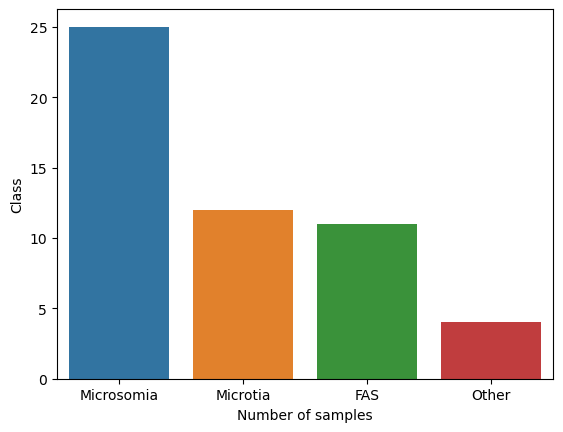

In [23]:
df_class = df['Class'].value_counts().reset_index()
df_class.columns = ['Class', 'Count']
sns.barplot(x = "Class", y = "Count", data=df_class)
plt.xlabel("Number of samples")
plt.ylabel("Class")

Text(0, 0.5, 'Expression')

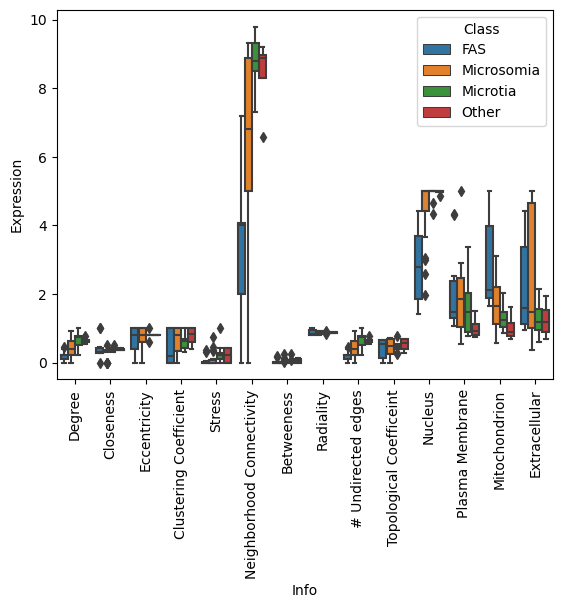

In [24]:
integer_columns = df.select_dtypes(include=['int64']).columns
normalized_df = df.copy()
normalized_df[integer_columns] = (df[integer_columns] - df[integer_columns].min()) / (df[integer_columns].max() - df[integer_columns].min())
df_m = pd.melt(normalized_df.iloc[:,1:16], id_vars =
"Class")
ax = sns.boxplot(x = "variable" , y = "value", data =
df_m, hue = "Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Info")
plt.ylabel("Expression")

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_transformed = df.copy()
df_transformed[numeric_columns] = df_transformed[numeric_columns].apply(lambda x: np.log1p(x))
print(df_transformed[numeric_columns])

      Degree  Closeness  Eccentricity  Clustering Coefficient    Stress  \
0   1.098612   0.253549      1.791759                0.000000  3.135494   
1   0.000000   0.000000      0.000000                0.000000  0.000000   
2   1.386294   0.252055      1.791759                0.693147  0.000000   
3   1.386294   0.252055      1.791759                0.693147  0.000000   
4   1.945910   0.329958      1.609438                0.182322  6.255750   
5   2.197225   0.306258      1.609438                0.693147  0.000000   
6   0.693147   0.693147      0.693147                0.000000  0.000000   
7   1.609438   0.258140      1.791759                0.693147  0.000000   
8   2.079442   0.327422      1.609438                0.644357  4.744932   
9   1.791759   0.285757      1.791759                0.530628  5.198497   
10  2.079442   0.386980      1.386294                0.356675  6.304449   
11  1.386294   0.252055      1.791759                0.693147  0.000000   
12  2.564949   0.405465  

In [26]:
import nltk
#nltk.download('punkt')
#from nltk import word_tokenize
#def tokenize_text(text):
 #   return word_tokenize(text) if isinstance(text, str) else text
#for column in df.columns:
 #   if df[column].dtype == 'object':
  #      df[column] = df[column].apply(tokenize_text)
#print(df)

In [27]:
from sklearn.preprocessing import LabelEncoder
def list_to_string(lst):
    if isinstance(lst, list):
        return ', '.join(map(str, lst))
    return str(lst)
for column in df.columns:
    df[column] = df[column].apply(list_to_string)
columns_to_drop = ['Protein Name', 'Class','Sequence','Family','Class.1','Variant ID','Disease','Disease Class']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Class']

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_encoded = pd.get_dummies(X, columns=['Target Family'])
X_encoded = pd.get_dummies(X_encoded, columns=['Consequence'])
X_encoded = pd.get_dummies(X_encoded, columns=['Alleles'])
X_encoded = pd.get_dummies(X_encoded, columns=['DiseaseAssociation'])

In [29]:
X_encoded['contains_transferase'] = X_encoded['Molecular Function'].str.contains('transferase', case=False, na=False)
X_encoded['contains_ligase'] = X_encoded['Molecular Function'].str.contains('ligase', case=False, na=False)
X_encoded['contains_protease'] = X_encoded['Molecular Function'].str.contains('protease', case=False, na=False)
X_encoded['contains_growth_factor'] = X_encoded['Molecular Function'].str.strip().str.replace('[^\w\s]','').str.contains('growth factor', case=False, na=False)
X_encoded['contains_DNA_binding'] = X_encoded['Molecular Function'].str.strip().str.replace('[^\w\s]','').str.contains('DNA binding', case=False, na=False)
X_encoded['contains_RNA_binding'] = X_encoded['Molecular Function'].str.strip().str.replace('[^\w\s]','').str.contains('RNA binding', case=False, na=False)
X_encoded['contains_activator'] = X_encoded['Molecular Function'].str.contains('activator', case=False, na=False)
X_encoded['contains_hydrolase'] = X_encoded['Molecular Function'].str.contains('hydrolase', case=False, na=False)
X_encoded['contains_oxidoreductase'] = X_encoded['Molecular Function'].str.contains('oxidoreductase', case=False, na=False)
X_encoded['contains_hydrolase'] = X_encoded['Molecular Function'].str.contains('hydrolase', case=False, na=False)
X_encoded['contains_regulator'] = X_encoded['Molecular Function'].str.contains('regulator', case=False, na=False)
X_encoded['contains_inhibitor'] = X_encoded['Molecular Function'].str.contains('inhibitor', case=False, na=False)
X_encoded['contains_repressor'] = X_encoded['Molecular Function'].str.contains('repressor', case=False, na=False)
X_encoded['contains_developmental'] = X_encoded['Molecular Function'].str.contains('developmental', case=False, na=False)
X_encoded['contains_alcohol'] = X_encoded['Disease knowledge'].str.contains('alcohol', case=False, na=False)
X_encoded['contains_meier_gorlin'] = X_encoded['Disease knowledge'].str.contains('meier-gorlin', case=False, na=False)

In [30]:
X_encoded['contains_degradation'] = X_encoded['Biological Process'].str.contains('degradation', case=False, na=False)
X_encoded['contains_metabolism'] = X_encoded['Biological Process'].str.contains('metabolism', case=False, na=False)
X_encoded['contains_mRNA'] = X_encoded['Biological Process'].str.contains('mRNA', case=False, na=False)
X_encoded['contains_rRNA'] = X_encoded['Biological Process'].str.contains('rRNA', case=False, na=False)
X_encoded['contains_transport'] = X_encoded['Biological Process'].str.contains('transport', case=False, na=False)
X_encoded['contains_cell_cycle'] = X_encoded['Biological Process'].str.contains('cell cycle', case=False, na=False)
X_encoded['contains_mitosis'] = X_encoded['Biological Process'].str.contains('mitosis', case=False, na=False)
X_encoded['contains_DNA_replication'] = X_encoded['Biological Process'].str.contains('DNA replication', case=False, na=False)
X_encoded['contains_processing'] = X_encoded['Biological Process'].str.contains('processing', case=False, na=False)
X_encoded['contains_regulation'] = X_encoded['Biological Process'].str.contains('regulation', case=False, na=False)
X_encoded['contains_transcription'] = X_encoded['Biological Process'].str.contains('transcription', case=False, na=False)
X_encoded['contains_differentiation'] = X_encoded['Biological Process'].str.contains('differentiation', case=False, na=False)
X_encoded['contains_biosynthesis'] = X_encoded['Biological Process'].str.contains('biosynthesis', case=False, na=False)
new_columns_to_drop = ['Molecular Function','Biological Process','DiseaseAssociation_type 2 diabetes mellitus','DiseaseAssociation_xeroderma pigmentosum','DiseaseAssociation_van der woude syndrome',
                      'DiseaseAssociation_uterine fibroid','DiseaseAssociation_ulnarmammary syndrome','DiseaseAssociation_trichorhinophalangeal syndrome type II','DiseaseAssociation_thrombosis',
                      'DiseaseAssociation_plague','DiseaseAssociation_night blindness','DiseaseAssociation_nager acrofacial dysostosis','DiseaseAssociation_muscular atrophy','DiseaseAssociation_multiple epiphyseal dysplasia 4',
                      'DiseaseAssociation_mayerrokitanskykusterhauser syndrome','DiseaseAssociation_mandibulofacial dysostosis guionalmeida type','DiseaseAssociation_male infertility',
                      'DiseaseAssociation_kabuki syndrome','DiseaseAssociation_familial benign fleck retina','DiseaseAssociation_craniosynostosis','DiseaseAssociation_cleft palate','DiseaseAssociation_GABA aminotransferase deficiency',
                      'DiseaseAssociation_CHARGE syndrome','DiseaseAssociation_cerebrocostomandibular syndrome','Disease knowledge']
X_encoded = X_encoded.drop(columns=new_columns_to_drop, axis=1)

In [31]:
X_encoded.replace('nan', 0, inplace=True)
X_encoded.replace('inf', 0, inplace=True)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41, 122), (11, 122), (41,), (11,))

In [92]:
X_train = X_train.replace({'True': True, 'False': False})
X_test = X_test.replace({'True': True, 'False': False})
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
label_encoder = LabelEncoder()
yXG_train = label_encoder.fit_transform(y_train)
yXG_test = label_encoder.fit_transform(y_test)
model_proteins = RandomForestClassifier(n_estimators=100, random_state=42)
model_proteins.fit(X_train, yXG_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred = model_proteins.predict(X_test)

In [94]:
accuracy = accuracy_score(yXG_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 1.0


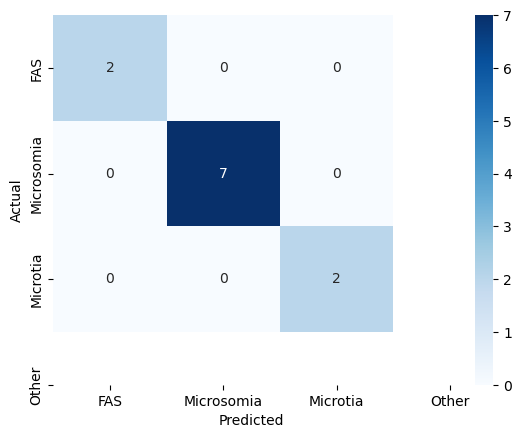

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model_proteins.predict(X_test)
cm = confusion_matrix(yXG_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['FAS','Microsomia','Microtia','Other'], 
            yticklabels=['FAS','Microsomia','Microtia','Other'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [97]:
report = classification_report(yXG_test, y_pred, target_names=['FAS', 'Microsomia', 'Microtia'])
print(report)

              precision    recall  f1-score   support

         FAS       1.00      1.00      1.00         2
  Microsomia       1.00      1.00      1.00         7
    Microtia       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [98]:
from sklearn.model_selection import cross_val_score, KFold
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_proteins, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.6  0.75 0.75 0.25 0.   0.5  0.75 0.5  0.75 0.5 ]


In [99]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.5349999999999999}
{0.2366960075708925}


In [100]:
import time
start_time = time.time()
importances = model_proteins.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_proteins.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.031 seconds


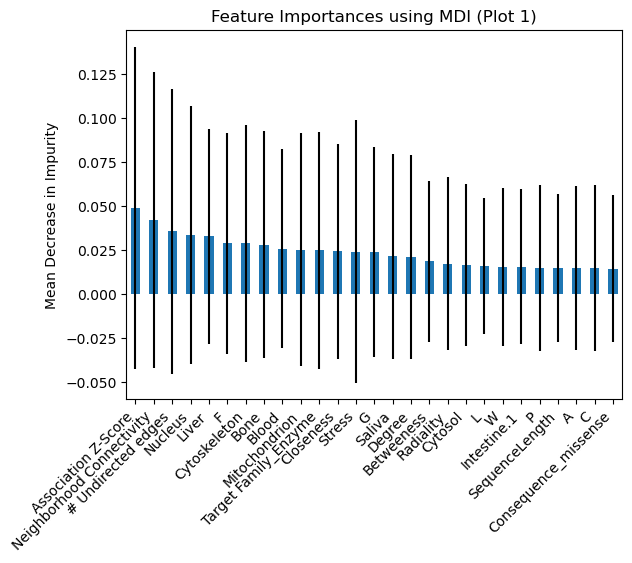

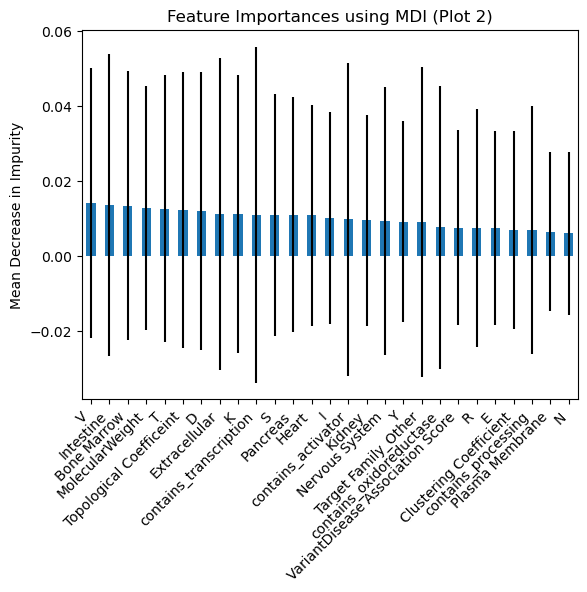

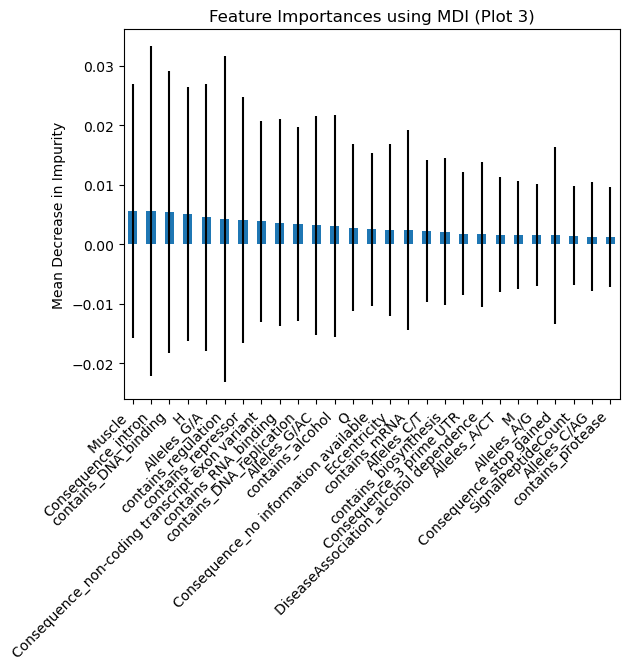

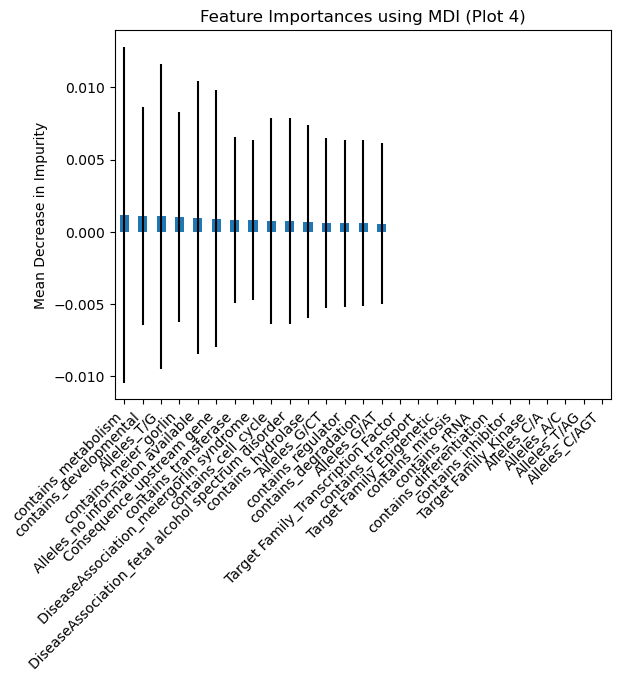

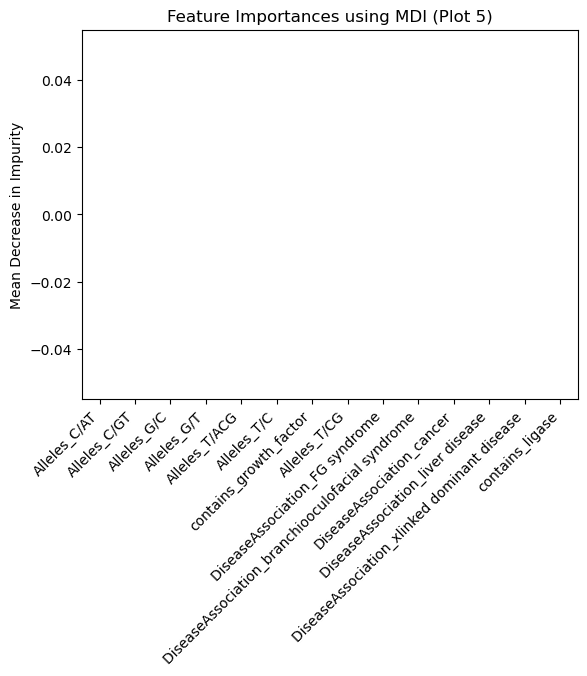

In [56]:
feature_names = X_encoded.columns.tolist()
forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)
importances_index = range(len(importances))  # Create an index for the original order
sorted_index = sorted(importances_index, key=lambda i: importances[i], reverse=True)  # Sort this index based on importances
sorted_std = [std[i] for i in sorted_index]
num_features_per_plot = 27
total_plots = len(sorted_importances) // num_features_per_plot + int(len(sorted_importances) % num_features_per_plot > 0)
for i in range(total_plots):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    subset_importances = sorted_importances[start_idx:end_idx]
    subset_std = sorted_std[start_idx:end_idx]

    fig, ax = plt.subplots()
    subset_importances.plot.bar(yerr=subset_std, ax=ax)
    ax.set_title(f"Feature Importances using MDI (Plot {i+1})")
    ax.set_ylabel("Mean Decrease in Impurity")
    ax.set_xticklabels(subset_importances.index, rotation=45, ha="right")
    plt.show()

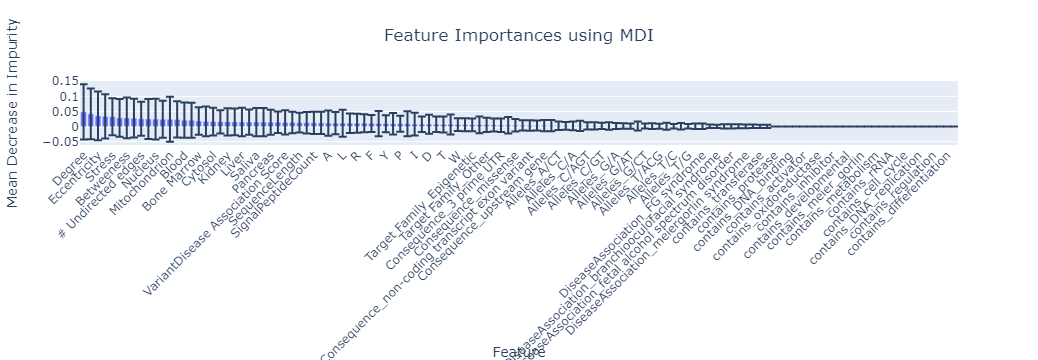

In [154]:
import plotly.express as px
fig = px.bar(df, x=feature_names, y=sorted_importances.values, error_y=sorted_std,
             labels={'Features': 'Feature', 'Importances': 'Mean Decrease in Impurity'},
             title='Feature Importances using MDI')
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Feature',
                  yaxis_title='Mean Decrease in Impurity', title_x=0.5)
fig.show()

In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

XGmodel = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)
XGmodel.fit(X_train, yXG_train)
predictions = XGmodel.predict(X_test)
accuracy = accuracy_score(yXG_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7272727272727273


In [102]:
from sklearn.model_selection import cross_val_score, KFold
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(XGmodel, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.6  0.5  0.75 0.5  0.5  0.75 0.75 0.75 0.75 0.5 ]


In [103]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.635}
{0.1184271928232701}


In [104]:
adamodel = AdaBoostClassifier(n_estimators=100, random_state=42)
adamodel.fit(X_train, yXG_train)
predictions = adamodel.predict(X_test)
accuracy = accuracy_score(yXG_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.45454545454545453


In [105]:
from sklearn.model_selection import cross_val_score, KFold
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(adamodel, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.2  0.5  0.75 0.25 0.5  0.75 0.75 0.75 0.5  0.75]


In [106]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.5700000000000001}
{0.20396078054371142}


In [145]:
Xstack_train, Xstack_temp, ystack_train, ystack_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
Xstack_val, Xstack_test, ystack_val, ystack_test = train_test_split(Xstack_temp, ystack_temp, test_size=0.5, random_state=42)
yS_train = label_encoder.fit_transform(ystack_train)
yS_test = label_encoder.transform(ystack_test)
yS_val = label_encoder.transform(ystack_val)
for col in Xstack_train.columns:
    Xstack_train[col] = pd.to_numeric(Xstack_train[col], errors='coerce')
for col in Xstack_test.columns:
    Xstack_test[col] = pd.to_numeric(Xstack_test[col], errors='coerce')
for col in Xstack_val.columns:
    Xstack_val[col] = pd.to_numeric(Xstack_val[col], errors='coerce')
rf_pred = model_proteins.predict(Xstack_val)
xgb_pred = XGmodel.predict(Xstack_val)
ada_pred = adamodel.predict(Xstack_val)
stacked_predictions = np.column_stack((rf_pred, xgb_pred, ada_pred))
meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(stacked_predictions, yS_val)
final_pred = meta_model.predict(np.column_stack((model_proteins.predict(Xstack_test), XGmodel.predict(Xstack_test), adamodel.predict(Xstack_test))))

In [146]:
accuracy = accuracy_score(yS_test, final_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9090909090909091


In [147]:
from sklearn.model_selection import cross_val_score, KFold
scaler = StandardScaler()
Xstack_train_scaled = scaler.fit_transform(Xstack_train)
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(meta_model, Xstack_train_scaled, yS_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.5        0.66666667 0.66666667 0.33333333 0.33333333 1.
 0.66666667 0.33333333 0.33333333 0.66666667]


In [148]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.55}
{0.21147629234082532}
